In [1]:
import pandas as pd
import sqlite3 as sql3

In [2]:
conn = sql3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
first_five = "select * from facts limit 5"
pd.read_sql_query(first_five, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Summary Statistics

In [4]:
table_facts = "select min(population) min_pop, max(population) max_pop, min(population_growth) min_pop_growth, max(population_growth) max_pop_growth from facts"
pd.read_sql_query(table_facts, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


In [5]:
no_pop = "select * from facts where population == (select min(population) from facts)"
pd.read_sql_query(no_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
billion_pop = "select * from facts where population == (select max(population) from facts)"
pd.read_sql_query(billion_pop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


It appears that Antarctica has no population according to this dataset. While the "World" has a population of 7256490011 which would obviously then be the whole worlds population

/Users/markrabins/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13594320>,
      dtype=object)

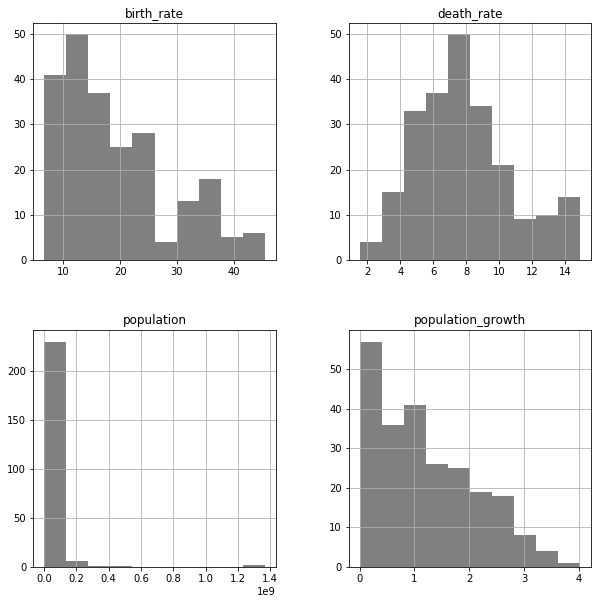

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

histo_data = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(histo_data, conn).hist(ax=ax, color="grey")

### Further Exploration Could Include:

* Which countries have the highest population density?
* Population density is the ratio of population to land area. Compare your results with those from Wikipedia.
* Generate a histogram of population densities.
* Which countries have the highest ratios of water to land? Which countries have more water than land?